In [146]:
# importing required basic libraries
import warnings
warnings.simplefilter("ignore")
import joblib

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

In [148]:
df = pd.read_csv('glass.csv')

In [149]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


This is the classification problem where we have to identify the type of glass between window glass or non-window glass

In [150]:
# checking if the dataset consists of any mising values
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

We can observe that there are no null values in the dataset.

In [151]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
208    False
209    False
210    False
211    False
212    False
Length: 213, dtype: bool

In [152]:
# checking the Dtypes of each feature in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [153]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [154]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [155]:
df.sample()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
63,65,1.52172,13.48,3.74,0.9,72.01,0.18,9.61,0.0,0.07,1


we can observe that column 1 and 1.1 are of int data types and remaining columns are of float data types

In [156]:
# checking the skewness of dataset
df.skew()

1          0.000000
1.52101    1.639658
13.64      0.457318
4.49      -1.154323
1.10       0.900017
71.78     -0.744546
0.06       6.549276
8.75       2.040591
0.00       3.406749
0.00.1     1.747173
1.1        1.108861
dtype: float64

we can observe that in column 1, 1.52,4.49, 1.10, 1.778,0.06,8.75,0.00,0.00.1,1.1 may contain outliers as there skew range is not in between +-0.5.

In [157]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


count - there are no missing values all the columns are having 213 values
mean and median comparision - we can observe that in columns 4.49, 1.10 0.00, 1.1 there is a difference between values which says that tha data set might be skewed.
standard deviation - column 1 shows greater variability than other columns

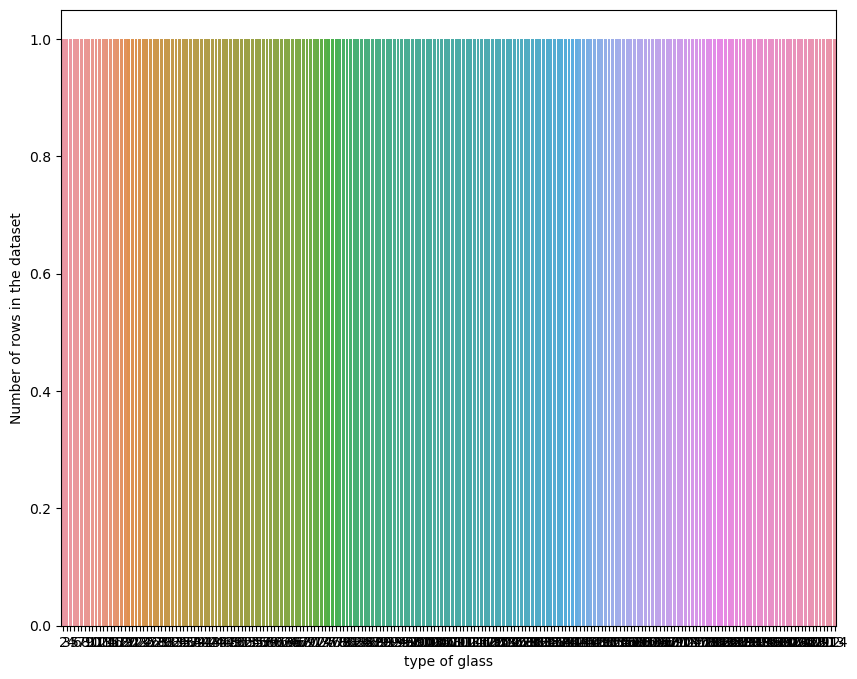

In [158]:
plt.figure(figsize=(10,8))
sns.countplot(x ='1', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

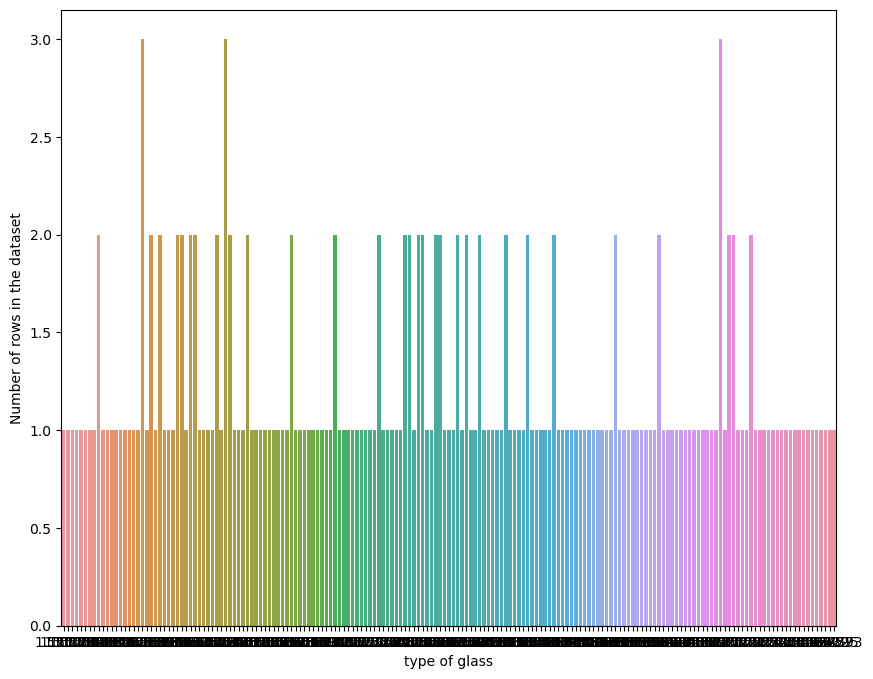

In [159]:
plt.figure(figsize=(10,8))
sns.countplot(x ='1.52101', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

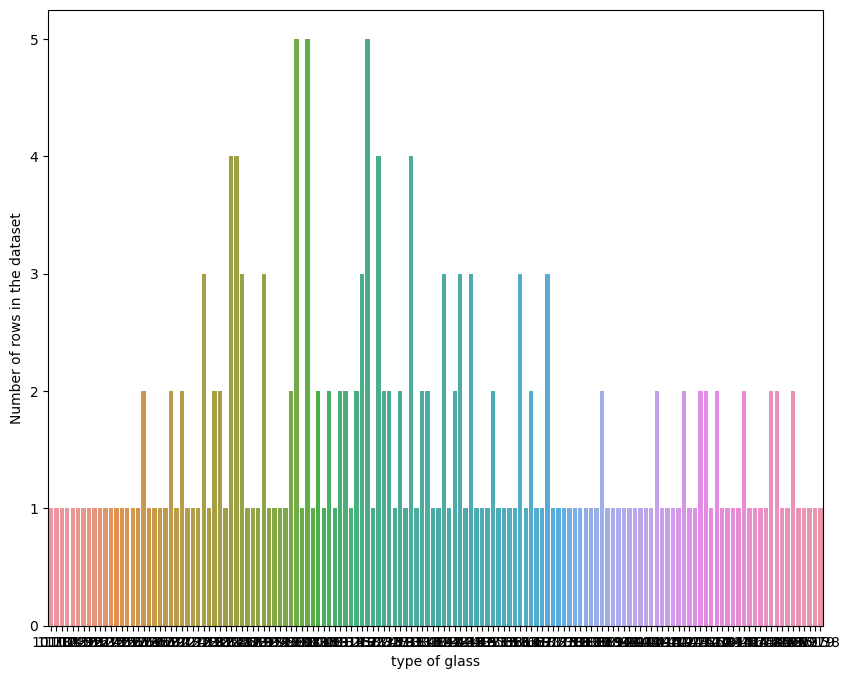

In [160]:
plt.figure(figsize=(10,8))
sns.countplot(x ='13.64', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

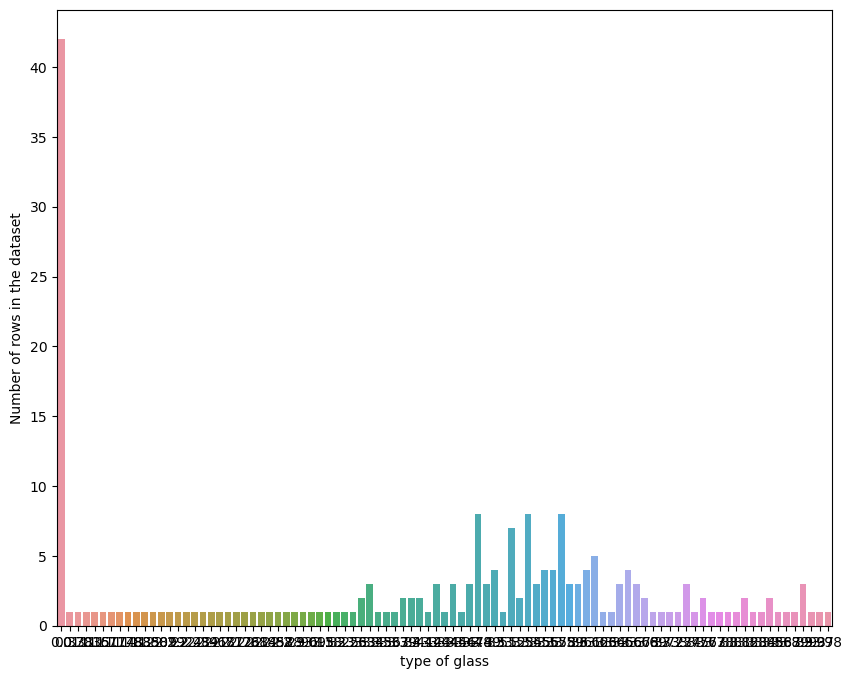

In [161]:
plt.figure(figsize=(10,8))
sns.countplot(x ='4.49', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

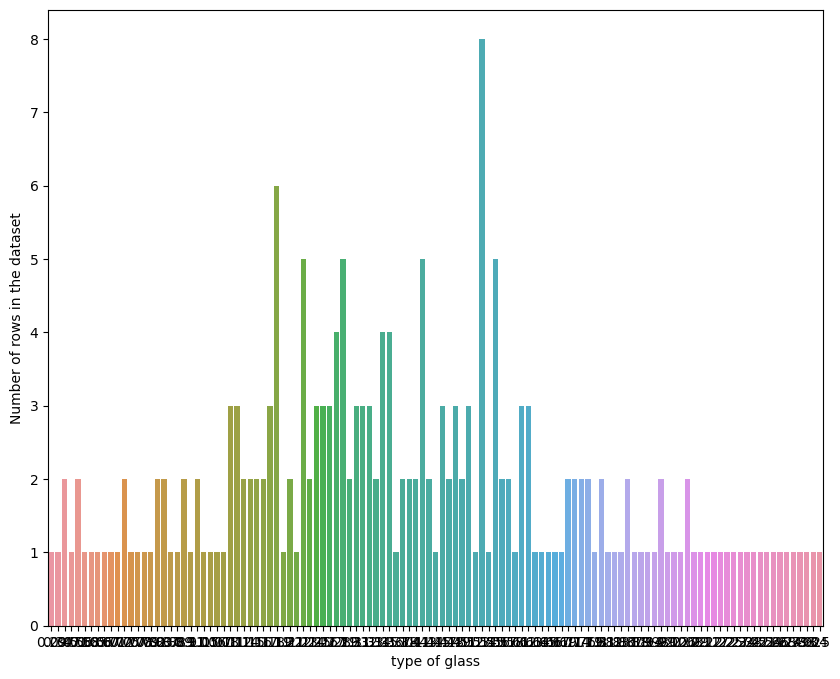

In [162]:
plt.figure(figsize=(10,8))
sns.countplot(x ='1.10', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

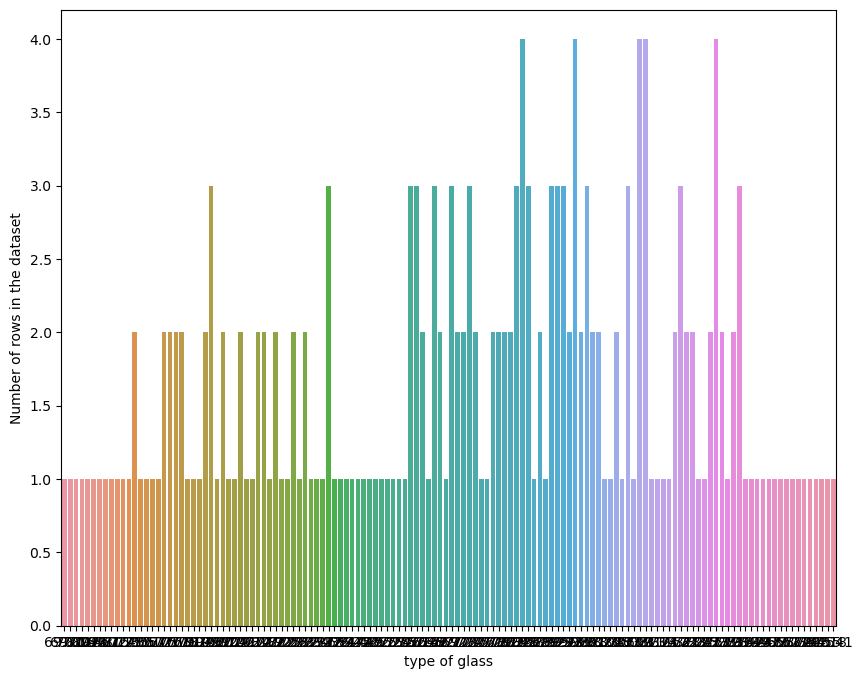

In [163]:
plt.figure(figsize=(10,8))
sns.countplot(x ='71.78', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

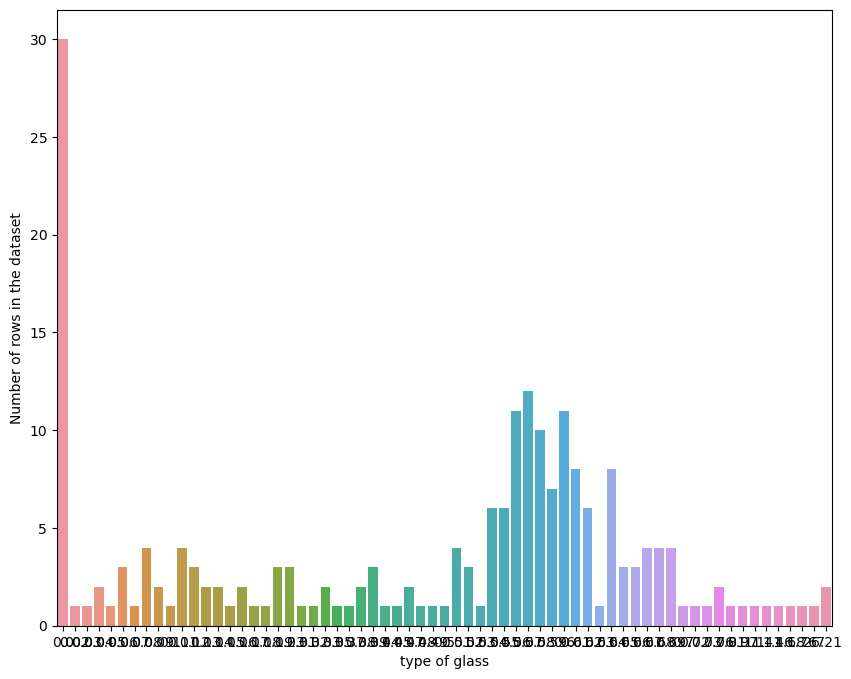

In [164]:
plt.figure(figsize=(10,8))
sns.countplot(x ='0.06', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

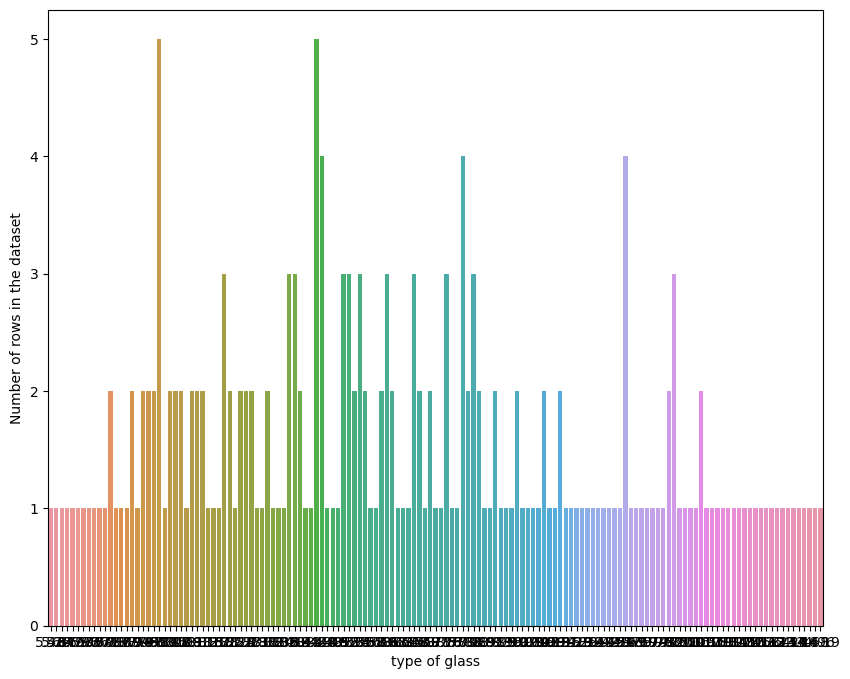

In [165]:
plt.figure(figsize=(10,8))
sns.countplot(x ='8.75', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

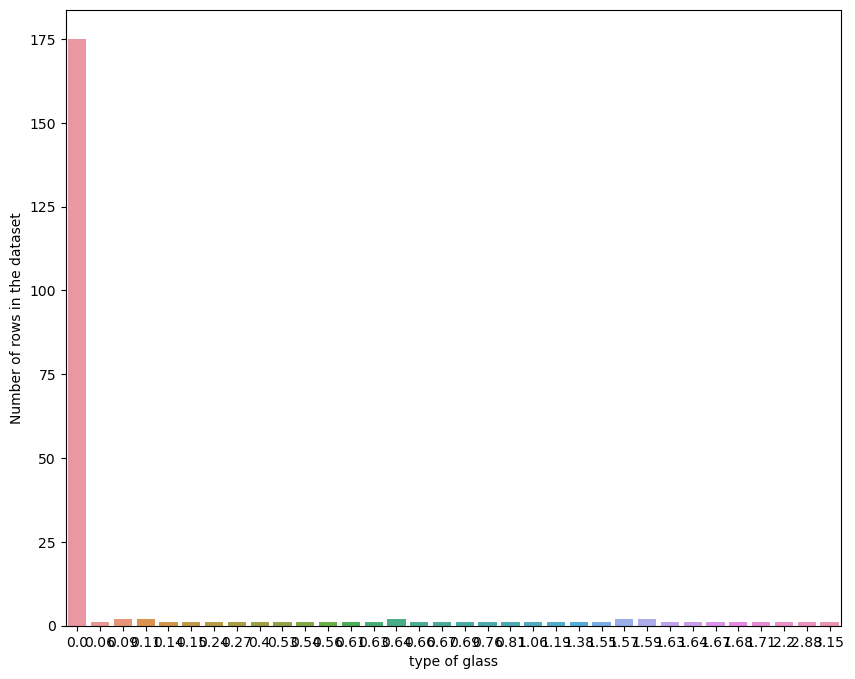

In [166]:
plt.figure(figsize=(10,8))
sns.countplot(x ='0.00', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

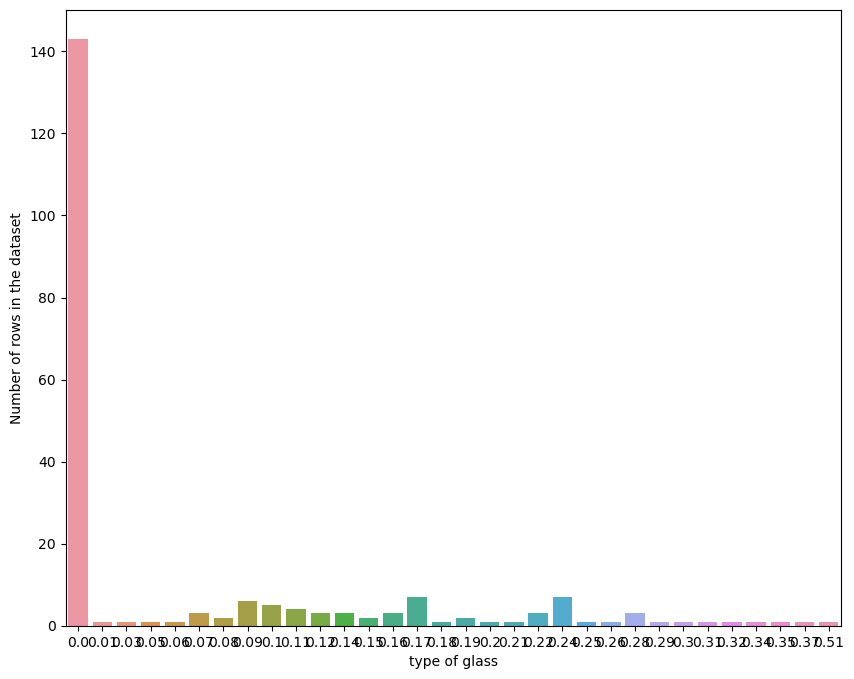

In [167]:
plt.figure(figsize=(10,8))
sns.countplot(x ='0.00.1', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

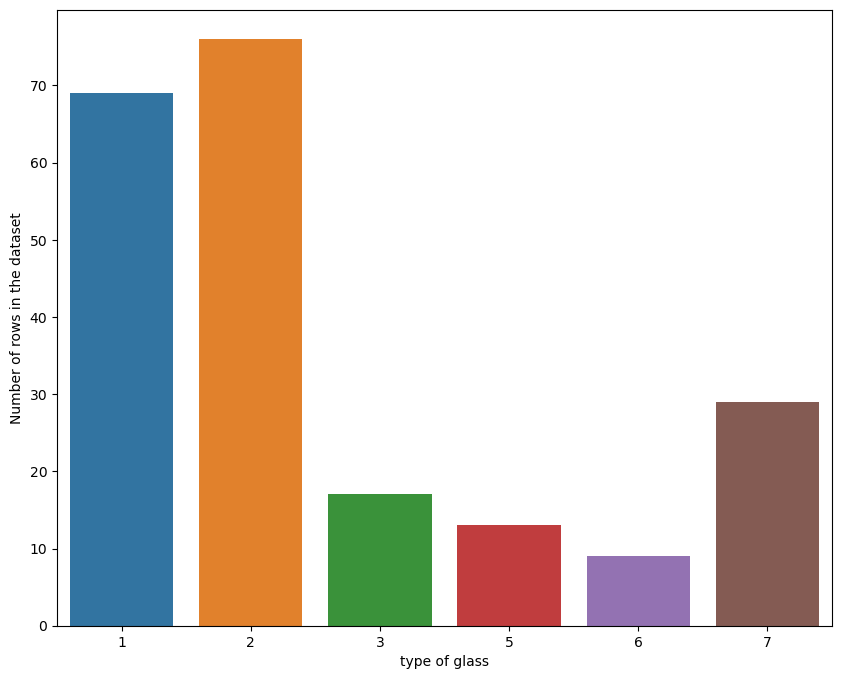

In [168]:
plt.figure(figsize=(10,8))
sns.countplot(x ='1.1', data = df)
plt.xlabel('type of glass')
plt.ylabel('Number of rows in the dataset')
plt.show()

In [169]:
glass_type_counts = df['1.1'].value_counts()
for glass_type, count in glass_type_counts.items():
    print(f"Type of Glass: {glass_type}, Count: {count}")

Type of Glass: 2, Count: 76
Type of Glass: 1, Count: 69
Type of Glass: 7, Count: 29
Type of Glass: 3, Count: 17
Type of Glass: 5, Count: 13
Type of Glass: 6, Count: 9


In [170]:
#droping the target variable quality
index=0
labels =df['1.1']
features = df.drop('1.1', axis=1)

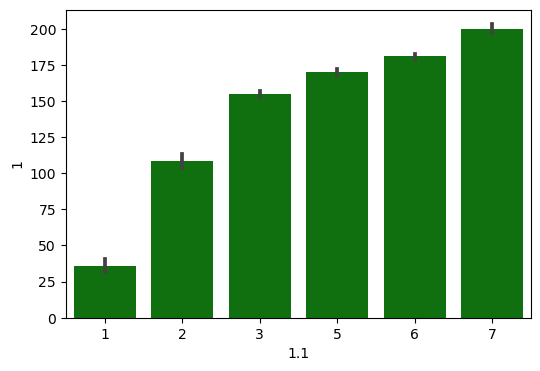

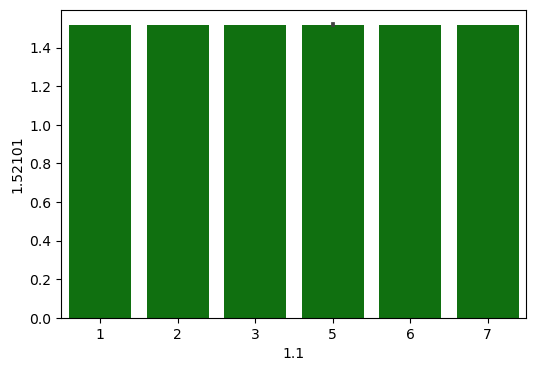

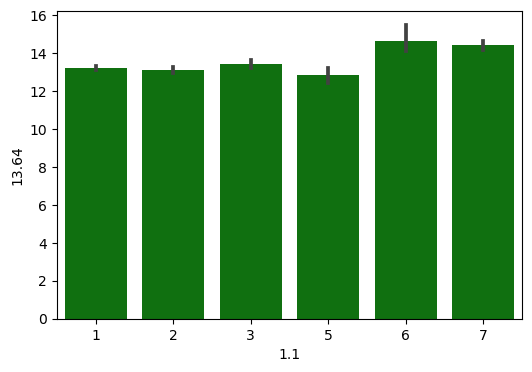

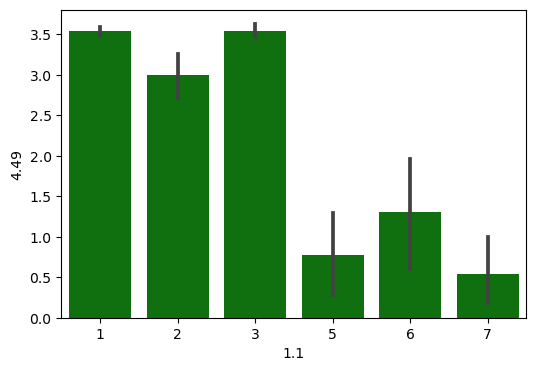

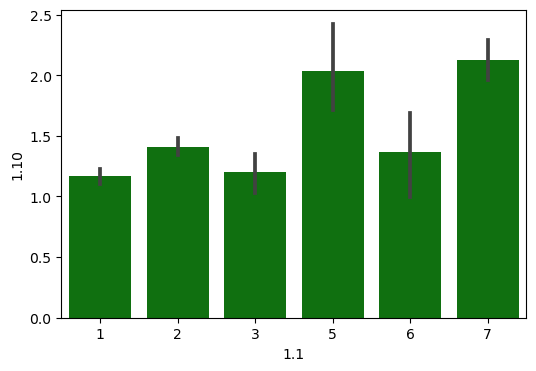

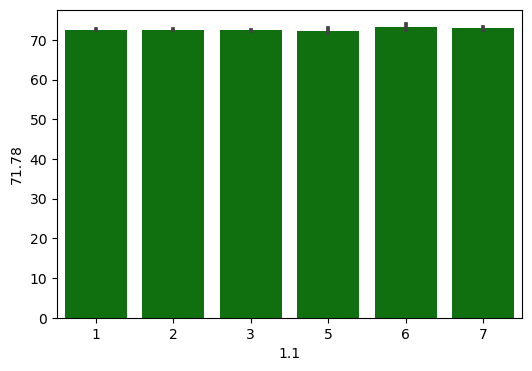

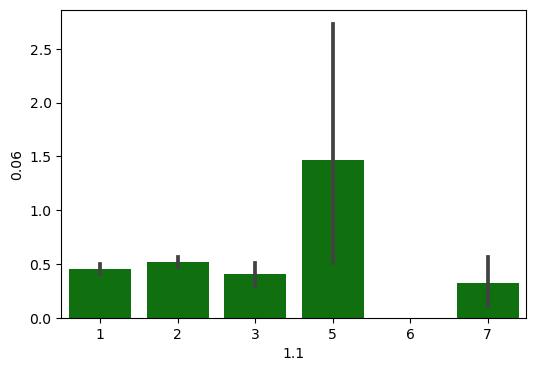

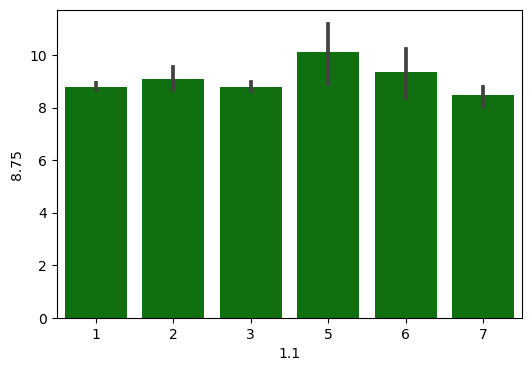

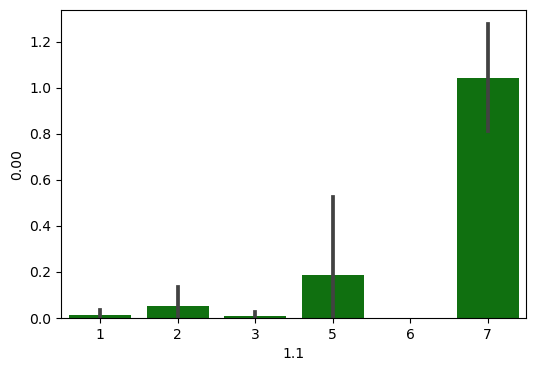

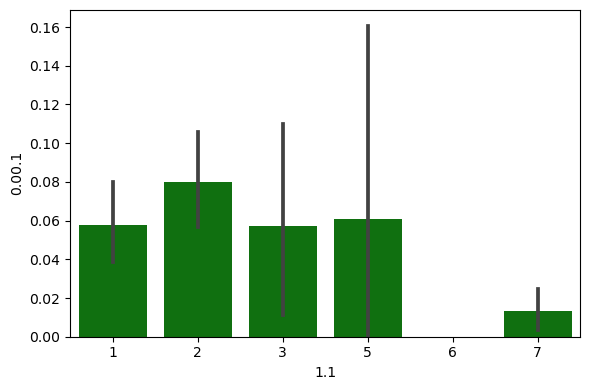

In [171]:
# barplot for each feature vs target variable
for col in features.items():
    plt.figure(figsize=(6,4))
    sns.barplot(x=labels, y=col[index], data=df, color="green")
plt.tight_layout()
plt.show()

we can observe in reflective index(1) there is increase in pattern
for sodium vs type of glass all are equal not much to observe in pattern,
for magnesium vs type of glass there is no much difference except in the increase in type 6 glass
for aluminium vs type of glass there is improper pattern 
for silicon vs type of glass there is improper pattern
for potassium vs type of glass all are equal not much to observe in pattern
for calcium vs type of glass there is improper pattern
for barium vs type of glass there is increase and then decrease in the barplot
for iron there is improper patterm

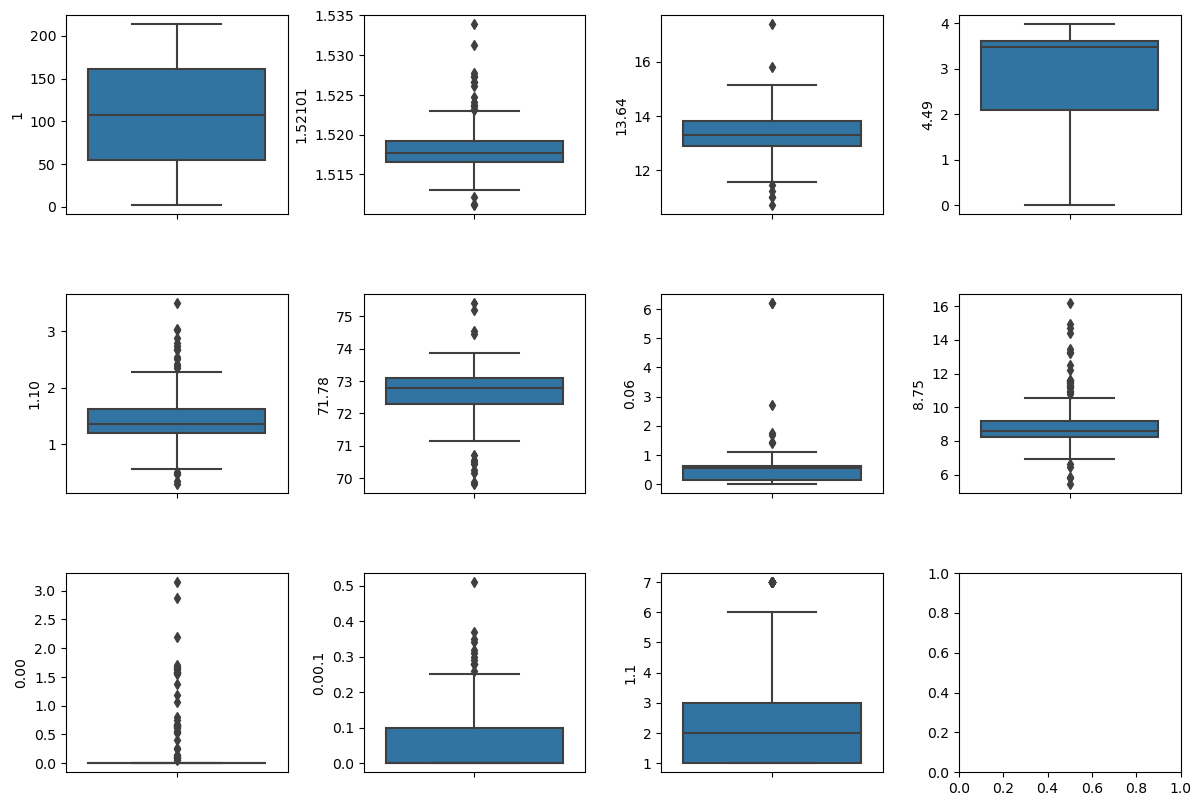

In [172]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12,8))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

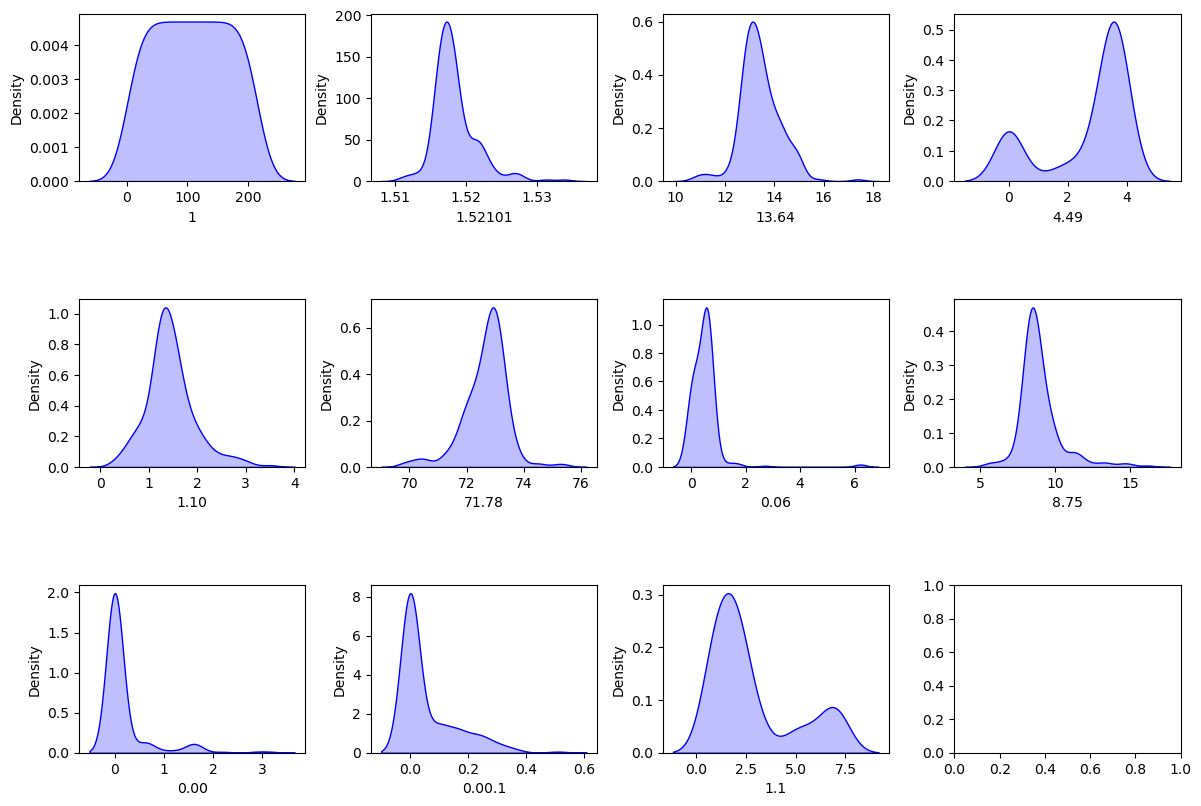

In [173]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12,8))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

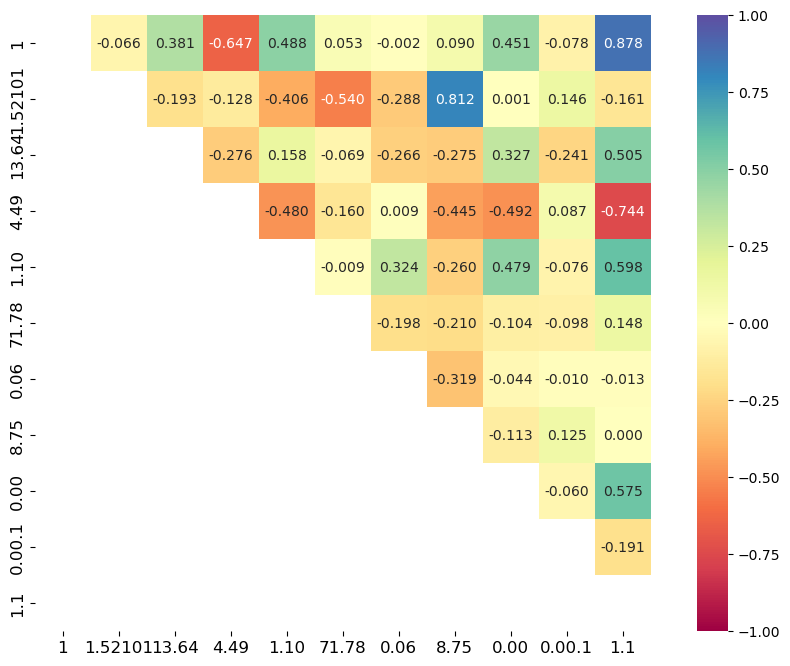

In [174]:
img = np.tril(df.corr())
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=img)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

as per my understanding of data analysis it would be prefered to remove 1.52101 and 0.00.1 colulms from daatset to get higher accuracy 

In [175]:
# dropping the columns
df = df.drop('1.52101', axis=1)

In [176]:
df = df.drop('0.00.1', axis = 1)

In [177]:
df

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1.1
0,2,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
1,3,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
2,4,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
3,5,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
4,6,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
...,...,...,...,...,...,...,...,...,...
208,210,14.14,0.00,2.88,72.61,0.08,9.18,1.06,7
209,211,14.92,0.00,1.99,73.06,0.00,8.40,1.59,7
210,212,14.36,0.00,2.02,73.42,0.00,8.44,1.64,7
211,213,14.38,0.00,1.94,73.61,0.00,8.48,1.57,7


In [178]:
# using z-score to remove skewness
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]

In [179]:
df

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1.1
0,2,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
1,3,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
2,4,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
3,5,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
4,6,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
...,...,...,...,...,...,...,...,...,...
207,209,14.37,0.00,2.74,72.85,0.00,9.45,0.54,7
208,210,14.14,0.00,2.88,72.61,0.08,9.18,1.06,7
209,211,14.92,0.00,1.99,73.06,0.00,8.40,1.59,7
210,212,14.36,0.00,2.02,73.42,0.00,8.44,1.64,7


In [180]:
#train test split
x = df.drop('1.1', axis=1)
y = df['1.1']

In [181]:
x

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00
0,2,13.89,3.60,1.36,72.73,0.48,7.83,0.00
1,3,13.53,3.55,1.54,72.99,0.39,7.78,0.00
2,4,13.21,3.69,1.29,72.61,0.57,8.22,0.00
3,5,13.27,3.62,1.24,73.08,0.55,8.07,0.00
4,6,12.79,3.61,1.62,72.97,0.64,8.07,0.00
...,...,...,...,...,...,...,...,...
207,209,14.37,0.00,2.74,72.85,0.00,9.45,0.54
208,210,14.14,0.00,2.88,72.61,0.08,9.18,1.06
209,211,14.92,0.00,1.99,73.06,0.00,8.40,1.59
210,212,14.36,0.00,2.02,73.42,0.00,8.44,1.64


In [182]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: 1.1, Length: 196, dtype: int64

In [183]:
y.value_counts()

1    69
2    69
7    23
3    17
5    10
6     8
Name: 1.1, dtype: int64

to balance the dataset we are using SMOTE

In [184]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [185]:
from imblearn.over_sampling import SMOTE
imb_tech = SMOTE()
x, y = imb_tech.fit_resample(x, y)
y.value_counts()

1    69
2    69
3    69
5    69
6    69
7    69
Name: 1.1, dtype: int64

In [186]:
x

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00
0,2,13.890000,3.60,1.360000,72.730000,0.480000,7.830000,0.000000
1,3,13.530000,3.55,1.540000,72.990000,0.390000,7.780000,0.000000
2,4,13.210000,3.69,1.290000,72.610000,0.570000,8.220000,0.000000
3,5,13.270000,3.62,1.240000,73.080000,0.550000,8.070000,0.000000
4,6,12.790000,3.61,1.620000,72.970000,0.640000,8.070000,0.000000
...,...,...,...,...,...,...,...,...
409,199,14.593939,0.00,2.546085,73.211137,0.028886,8.874397,0.637222
410,193,14.760283,0.00,2.039074,73.046735,0.000000,8.553650,1.492315
411,202,14.754971,0.00,2.468526,73.594642,0.008088,8.529511,0.576175
412,201,14.943313,0.00,2.472489,73.329250,0.029160,8.646612,0.542504


In [187]:
y

0      1
1      1
2      1
3      1
4      1
      ..
409    7
410    7
411    7
412    7
413    7
Name: 1.1, Length: 414, dtype: int64

In [188]:
df['1.1'] = df['1.1'].apply(lambda y_value: 1 if y_value >= 1 and y_value <= 4 else 0)

# Check the modified class labels
print(df['1.1'].value_counts())

1    155
0     41
Name: 1.1, dtype: int64


In [189]:
y

0      1
1      1
2      1
3      1
4      1
      ..
409    7
410    7
411    7
412    7
413    7
Name: 1.1, Length: 414, dtype: int64

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00
0,-2.472699,0.413937,0.944609,-0.400317,-0.087698,0.449877,-1.174663,-0.423856
1,-2.454936,-0.064057,0.911507,-0.009157,0.358692,0.151154,-1.216295,-0.423856
2,-2.437172,-0.488940,1.004193,-0.552434,-0.293724,0.748599,-0.849930,-0.423856
3,-2.419408,-0.409275,0.957850,-0.661089,0.513211,0.682216,-0.974827,-0.423856
4,-2.401645,-1.046600,0.951230,0.164692,0.324354,0.980939,-0.974827,-0.423856
...,...,...,...,...,...,...,...,...
409,1.026726,1.348599,-1.438732,2.177173,0.738358,-1.047432,-0.305047,1.215244
410,0.920145,1.569464,-1.438732,1.075385,0.456099,-1.143310,-0.572116,3.414768
411,1.080017,1.562411,-1.438732,2.008629,1.396791,-1.116466,-0.592215,1.058217
412,1.062254,1.812485,-1.438732,2.017242,0.941144,-1.046522,-0.494712,0.971605


In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [193]:
X_train

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00
101,-0.678577,-1.272319,0.388496,-1.552064,1.766536,0.018389,0.149249,-0.423856
173,0.795800,0.148385,0.679794,0.577582,0.049653,4.698373,-3.173021,2.637135
72,-1.193721,-0.316332,0.924748,0.056036,0.152666,0.881364,-1.124704,-0.423856
45,-1.673338,-0.515496,0.792340,-0.791476,-0.104867,0.748599,-0.342014,-0.423856
112,-0.376597,-0.024224,0.924748,-0.161275,-0.568425,0.980939,-1.066418,-0.423856
...,...,...,...,...,...,...,...,...
213,0.369474,0.791778,1.057559,-1.343227,-2.417559,-0.354673,-0.090037,-0.423856
95,-0.785159,-0.741215,0.957850,-1.052249,-0.757282,0.980939,-0.092219,-0.423856
32,-1.904265,-1.338707,0.858544,-0.356854,1.045445,0.848173,-0.575155,-0.423856
380,1.239889,1.039547,-1.438732,1.218107,0.981758,-1.143310,-0.567756,3.461596


In [194]:
X_test

,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00
266,0.493819,-1.370397,-1.072892,0.328476,0.654843,0.534671,1.812005,-0.423856
345,0.635928,0.794466,-0.046589,0.104080,-0.665962,-1.143310,0.330587,-0.423856
228,0.120784,-0.395647,0.930600,-0.414475,-0.127402,0.568728,-0.653664,-0.423856
273,0.458292,-1.002962,-1.088879,0.639666,1.303114,1.725456,0.754709,-0.423856
208,0.262892,-0.506099,0.854277,-0.548927,-0.262157,0.698287,-0.446762,-0.423856
...,...,...,...,...,...,...,...,...
314,0.653691,0.566261,0.120714,-0.470275,-0.245279,-1.143310,0.304583,-0.423856
202,0.156311,-1.682395,0.884498,-0.284627,0.078433,0.763957,-0.611072,-0.423856
33,-1.886501,-1.179376,0.904887,-0.443779,0.290016,0.748599,-0.408626,-0.423856
76,-1.122667,-0.767770,0.931369,-0.009157,0.083991,0.881364,-0.999806,-0.423856


In [195]:
Y_train

101    2
173    7
72     2
45     1
112    2
      ..
213    3
95     2
32     1
380    7
131    2
Name: 1.1, Length: 331, dtype: int64

In [196]:
Y_test

266    5
345    6
228    3
273    5
208    3
      ..
314    6
202    3
33     1
76     2
214    3
Name: 1.1, Length: 83, dtype: int64

In [197]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [199]:
# defining the model used to call for different ml algorithms
def prediction(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    accu_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", accu_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = accu_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [200]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
prediction(model, x, y)

Accuracy Score: 95.18072289156626

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.73      0.85        15
           3       0.76      1.00      0.87        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        12

    accuracy                           0.95        83
   macro avg       0.96      0.96      0.95        83
weighted avg       0.96      0.95      0.95        83

Cross Validation Score: 93.93476344401999

Accuracy Score - Cross Validation Score is 1.2459594475462694


In [201]:
# Support Vector Classifier
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
prediction(model, x, y)

Accuracy Score: 92.7710843373494

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.91      0.67      0.77        15
           3       0.76      1.00      0.87        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        12

    accuracy                           0.93        83
   macro avg       0.94      0.93      0.93        83
weighted avg       0.93      0.93      0.93        83

Cross Validation Score: 93.44989714957391

Accuracy Score - Cross Validation Score is -0.6788128122245212


In [202]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=45, max_depth=15)
prediction(model, x, y)

Accuracy Score: 100.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        12

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

Cross Validation Score: 94.65765501028504

Accuracy Score - Cross Validation Score is 5.3423449897149595


In [203]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=15, random_state=21)
prediction(model, x, y)

Accuracy Score: 97.59036144578313

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.87      0.93        15
           3       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        12

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83

Cross Validation Score: 96.60593593887747

Accuracy Score - Cross Validation Score is 0.9844255069056658


In [205]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=15)
prediction(model, x, y)

Accuracy Score: 89.1566265060241

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.80      0.53      0.64        15
           3       0.68      1.00      0.81        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      0.83      0.91        12

    accuracy                           0.89        83
   macro avg       0.90      0.89      0.89        83
weighted avg       0.90      0.89      0.89        83

Cross Validation Score: 92.0129297678519

Accuracy Score - Cross Validation Score is -2.8563032618278044


In [206]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
prediction(model, x, y)

Accuracy Score: 98.79518072289156

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.93      0.97        15
           3       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        12

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83

Cross Validation Score: 96.3737878342639

Accuracy Score - Cross Validation Score is 2.4213928886276648


In [212]:
# Perform Grid Search with cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [213]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [216]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [219]:
# Fit the best model on the training data
best_model = ExtraTreesClassifier(max_depth=None, min_samples_split=2, n_estimators=50)
best_model.fit(X_train, Y_train)

ExtraTreesClassifier(n_estimators=50)

In [220]:
# Predict using the best model
fmod_pred = best_model.predict(X_test)

In [221]:
# Calculate accuracy of the best model
fmod_acc = (accuracy_score(Y_test, fmod_pred)) * 100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 98.79518072289156


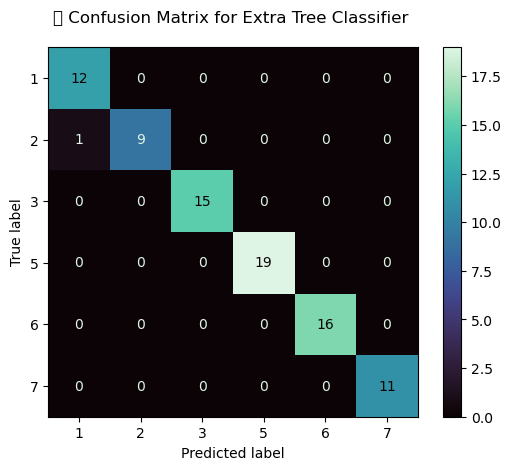

In [227]:
#confussion matrix
con_mat = df.columns
metrics.plot_confusion_matrix(best_model, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()

In [228]:
#saving the model
filename = "glass_identification.pkl"
joblib.dump(best_model, filename)

['glass_identification.pkl']